<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 5 - Same as task 4, but adding noise to input data. After drawing one of the 100
bootstrap datasets and before fitting the predictive model: add random noise by adding to the
input data matrix the noise output from np.random.randn(80, 1000) * 0.1. Before looping
over the 100 bootstrap datasets, make sure to set random seed once via
np.random.seed(0).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 4.8 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True,
memory='nilearn_cache')
input_variables =masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F',
dtype=int) #gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 895098880 of 905208634 bytes (98.9%,    0.2s remaining) ...done. (21 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
X, y = input_variables, output_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
coefs = []
np.random.seed(0) # This time we also need to set the random seed to 0

In [ ]:
n_iterations = 100
for i in range(n_iterations):
    X_train = resample(X_train, replace=True, n_samples=80) # X_train is the given bootstrap sample in the current iteration
    X_train = scaler.fit_transform(X_train) # Here we run the scaler on every iteration
    noise = np.random.randn(80, 1000) * 0.1 # We create a variable with noise
    X_train = X_train * noise # We multiply our training set by the noise
    LR_boot = LogisticRegression(max_iter=1e5, penalty = 'l1', C = 1, solver = 'saga').fit(X_train,y_train) # We fit the LR model to the current bootstrap sample  coefficients.append(LR_boot.coef_) # Store the coefficients in the "coefficients" array
    coefs.append(LR_boot.coef_)

In [ ]:
models = list(range(0,100))
len(models)
l_zeroes = []

for x in models:
    l = np.count_nonzero(coefs[x]==0)
    l_zeroes.append(l)

print(l_zeroes)

[993, 991, 990, 989, 989, 988, 988, 989, 989, 988, 987, 988, 989, 989, 991, 984, 989, 986, 989, 985, 990, 989, 990, 990, 985, 991, 988, 990, 987, 988, 991, 989, 987, 989, 987, 990, 992, 988, 988, 988, 989, 989, 989, 984, 984, 993, 989, 990, 992, 990, 985, 989, 984, 988, 987, 992, 988, 989, 988, 987, 987, 989, 990, 991, 993, 983, 990, 988, 985, 990, 988, 990, 988, 990, 988, 990, 987, 992, 988, 990, 986, 991, 986, 989, 990, 981, 990, 990, 988, 989, 990, 988, 985, 990, 989, 990, 989, 988, 987, 986]


In [ ]:
# We're ready to get a count of the total number of times each input variable has been given a coefficient of zero across bootstrap samples:
coefs = np.squeeze(coefs) # First we remove the extraneous dimension from our coefs variable
df = pd.DataFrame(coefs) # We turn coefs into a pandas dataframe to get rows and columns
y = df[df == 0].count()  # We use count.() to sum the zeroes in each column
x = list(range(0,1000)) # We create a simple x variable for our plot

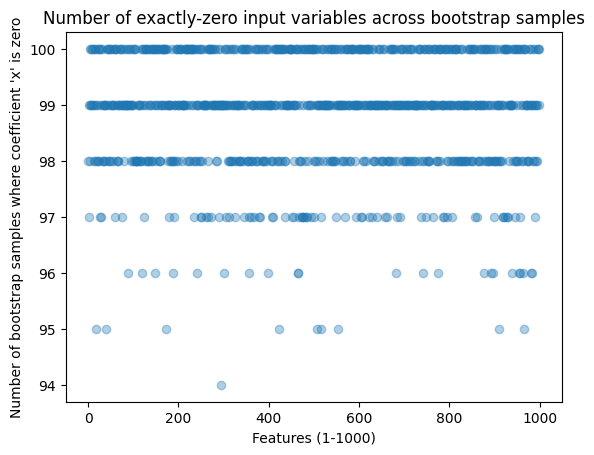

In [ ]:
plt.style.use("default")
plt.scatter(x,y,alpha=0.35)
plt.gca().set(
    title="Number of exactly-zero input variables across bootstrap samples",
    xlabel="Features (1-1000)",
    ylabel="Number of bootstrap samples where coefficient 'x' is zero",
)
plt.show()

This time around, we see that the vast majority of input variables gets zeroed out in every single one of our 100 bootstrap samples, leaving us with a null model. This showcases how fragile lasso regression is to noise in the data.